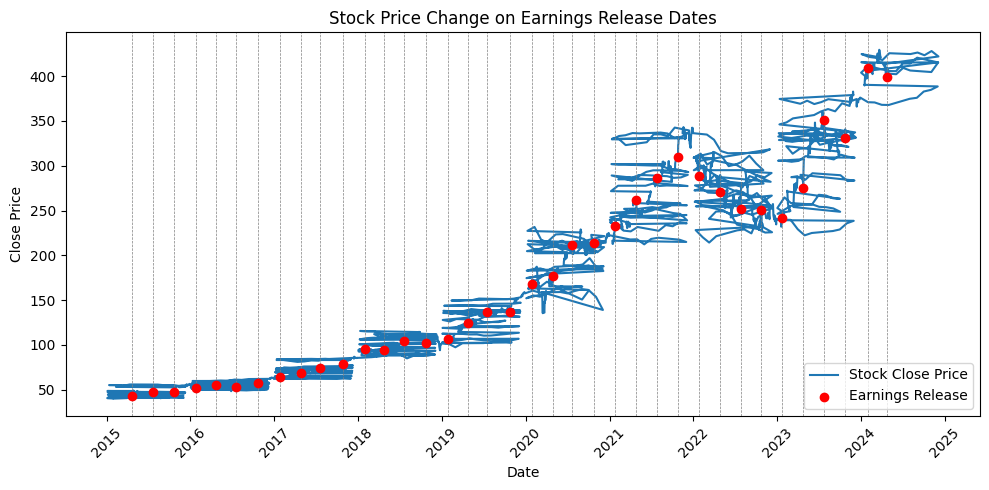

         Date  Prev Close       Close   Change %
34 2023-07-25  275.420013  350.980011  27.434462
36 2024-01-30  330.529999  408.589996  23.616615
20 2020-01-29  137.240005  168.039993  22.442427
12 2018-01-31   78.760002   95.010002  20.632300
22 2020-07-22  177.429993  211.750000  19.342844
17 2019-04-24  106.379997  125.010002  17.512696
33 2023-04-25  242.039993  275.420013  13.791118
25 2021-04-27  232.330002  261.970001  12.757715
8  2017-01-26   57.250000   64.269997  12.262003
14 2018-07-19   94.260002  104.400002  10.757479
26 2021-07-27  261.970001  286.540009   9.378940
18 2019-07-18  125.010002  136.419998   9.127266
2  2015-07-21   43.340000   47.279999   9.090907
24 2021-01-26  213.250000  232.330002   8.947246
10 2017-07-20   68.269997   74.220001   8.715401
4  2016-01-28   48.029999   52.060001   8.390594
27 2021-10-26  286.540009  310.109985   8.225719
7  2016-10-20   53.090000   57.250000   7.835751
5  2016-04-21   52.060001   55.779999   7.145597
9  2017-04-27   64.2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = '/content/MSFT.xlsx'
sheet_earnings = 'Sheet1'
sheet_stock = 'Sheet2'

df_earnings = pd.read_excel(file_path, sheet_name=sheet_earnings)
df_stock = pd.read_excel(file_path, sheet_name=sheet_stock)

df_earnings['Date'] = pd.to_datetime(df_earnings['Date'])

df_stock['Date'] = pd.to_datetime(df_stock['Date'])

df_merged = pd.merge(df_stock, df_earnings, on='Date')

df_merged['Prev Close'] = df_merged['Close'].shift(1)
df_merged['Change %'] = ((df_merged['Close'] - df_merged['Prev Close']) / df_merged['Prev Close']) * 100

df_filtered = df_merged.dropna(subset=['Change %'])

df_filtered = df_filtered.sort_values('Change %', ascending=False)

# Plotting
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df_stock['Date'], df_stock['Close'], label='Stock Close Price')
ax.scatter(df_filtered['Date'], df_filtered['Close'], color='red', label='Earnings Release', zorder=5)


for date in df_filtered['Date']:
    ax.axvline(x=date, color='gray', linestyle='--', lw=0.5)

ax.set_title('Stock Price Change on Earnings Release Dates')
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(df_filtered[['Date', 'Prev Close', 'Close', 'Change %']])


In [ ]:
wins = df_filtered[df_filtered['Change %'] > 5]

win_percentage = (len(wins) / len(df_filtered)) * 100

print(f"Win Percentage (days with >10% positive change): {win_percentage:.2f}%")


Win Percentage (days with >10% positive change): 59.46%
